findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

y = 0.049x^2 + 6.014x + 133.046


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

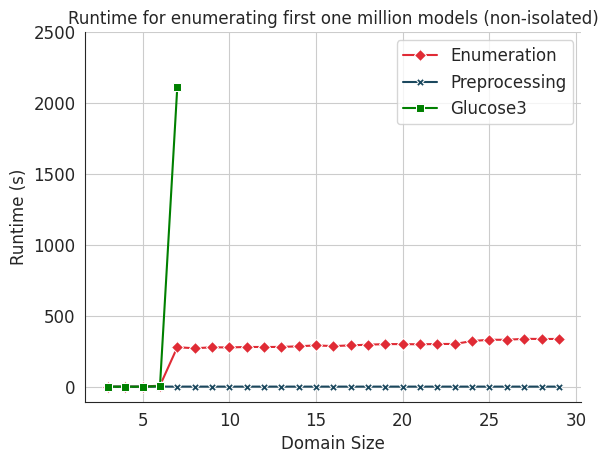

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file = "/home/mengqiaolan/counting_fo2/models/enum/nonisolated_graph.wfomcs.res"
res = pd.read_csv(res_file, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
# print(res)

x = np.array(res['n'])
y = np.array(res['t_enum'])
coefficients = np.polyfit(x, y, 2)
a, b, c = coefficients
y_fit = a * x**2 + b * x + c
print(f"y = {a:.3f}x^2 + {b:.3f}x + {c:.3f}")


df = pd.DataFrame({'domain_size': x, 'runtime': y, 't_pre': np.array(res['t_pre']), 'fit': y_fit})
df = df[df['domain_size'] < 30]

# plt.figure(figsize=(12, 6))

# sns.lineplot(data=df, x='domain_size', y='fit', color='#2e86c2', label='Quadratic Regression', linestyle='--')

# sns.scatterplot(data=df, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Enumeration')
# sns.scatterplot(data=df, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Preprocessing')

sns.lineplot(data=df, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Enumeration')
sns.lineplot(data=df, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Preprocessing')


pysat_res = [
    [3, 4, 7.414817810058594e-05],
    [4, 41, 0.00034356117248535156],
    [5, 768, 0.00937795639038086],
    [6, 27449, 4.4760894775390625],
    [7, 1000001, 2116.069650888443]
]
pysat_res = pd.DataFrame(pysat_res, columns=['domain_size', 'model_cnt', 'runtime'])
# sns.scatterplot(data=pysat_res, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')
sns.lineplot(data=pysat_res, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('Runtime for enumerating first one million models (non-isolated)', fontproperties=font)
plt.xticks([5, 10, 15, 20, 25, 30,], fontproperties=font)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, ], fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

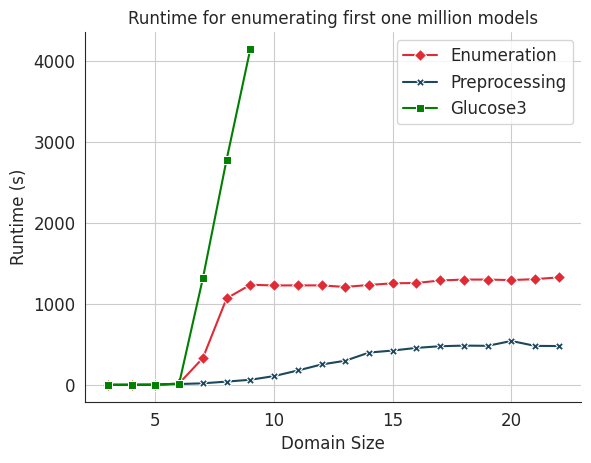

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file = "/home/mengqiaolan/counting_fo2/models/enum/friends-smokes.wfomcs.res"
res = pd.read_csv(res_file, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])

x = np.array(res['n'])
y = np.array(res['t_enum'])

df = pd.DataFrame({'domain_size': x, 'runtime': y, 't_pre': np.array(res['t_pre'])})
df = df[df['domain_size'] < 25]

# plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Enumeration')
sns.lineplot(data=df, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Preprocessing')


pysat_res = [
    [3, 8, 0.00011992454528808594],
    [4, 88, 0.0006825923919677734],
    [5, 1616, 0.02999258041381836],
    [6, 56448, 17.133636474609375],
    [7, 1000001, 1315.1580266952515],
    [8, 1000001, 2779.969294309616],
    [9, 1000001, 4145.173528909683]
]
pysat_res = pd.DataFrame(pysat_res, columns=['domain_size', 'model_cnt', 'runtime'])
# sns.scatterplot(data=pysat_res, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')
sns.lineplot(data=pysat_res, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('Runtime for enumerating first one million models (fr-sm)', fontproperties=font)
plt.xticks([5, 10, 15, 20, ], fontproperties=font)
plt.yticks([0, 1000, 2000, 3000, 4000], fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")


y = 0.069x^2 + 9.735x + 523.598


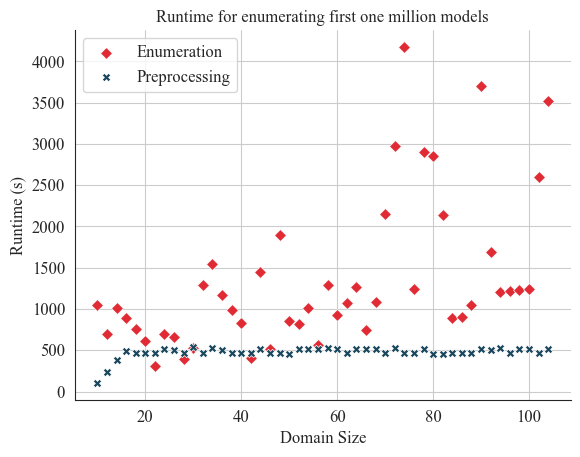

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file = "models/friends-smokes.wfomcs.res"
res = pd.read_csv(res_file, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
# print(res)

x = np.array(res['n'])
y = np.array(res['t_enum'])
coefficients = np.polyfit(x, y, 2)
a, b, c = coefficients
print(f"y = {a:.3f}x^2 + {b:.3f}x + {c:.3f}")


y_fit = a * x**2 + b * x + c
df = pd.DataFrame({'domain_size': x, 'runtime': y, 't_pre': np.array(res['t_pre']), 'fit': y_fit})

# plt.figure(figsize=(12, 6))

# sns.lineplot(data=df, x='domain_size', y='fit', color='#2e86c2', label='Quadratic Regression', linestyle='--')
sns.scatterplot(data=df, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Enumeration')
sns.scatterplot(data=df, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Preprocessing')


sns.set_style("white")
sns.despine(left=False, bottom=False)


plt.title('Runtime for enumerating first one million models', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

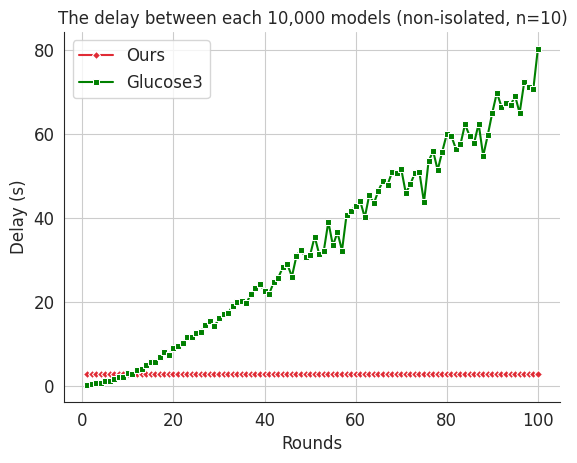

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_1 = "/home/mengqiaolan/counting_fo2/models/enum/noniso-delay"
res_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-non-iso-delay"
res_1 = pd.read_csv(res_1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
res_2 = pd.read_csv(res_2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])

x = np.array(res_1['i'])
y_1 = np.array(res_1['residual'])
y_2 = np.array(res_2['residual'])


df_1 = pd.DataFrame({'i': x, 'delay': y_1})
df_2 = pd.DataFrame({'i': x, 'delay': y_2})

# plt.figure(figsize=(12, 6))

sns.lineplot(data=df_1, x='i', y='delay', color='#e02b35', marker='D', markersize=4, label='Ours')
sns.lineplot(data=df_2, x='i', y='delay', color='green', marker='s', markersize=4, label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('The delay between each 10,000 models (non-isolated, n=10)', fontproperties=font)
plt.xticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.yticks([0, 20, 40, 60, 80], fontproperties=font)
plt.xlabel('Rounds', fontproperties=font)
plt.ylabel('Delay (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".delay.pdf")


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

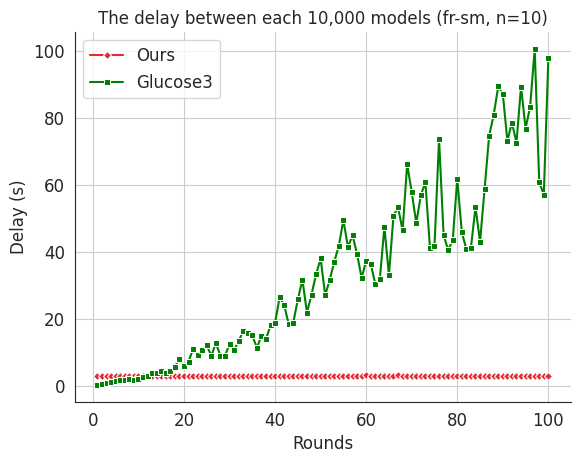

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_1 = "/home/mengqiaolan/counting_fo2/models/enum/fr-delay"
res_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-fr-sm-delay"
res_1 = pd.read_csv(res_1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
res_2 = pd.read_csv(res_2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])

x = np.array(res_1['i'])
y_1 = np.array(res_1['residual'])
y_2 = np.array(res_2['residual'])


df_1 = pd.DataFrame({'i': x, 'delay': y_1})
df_2 = pd.DataFrame({'i': x, 'delay': y_2})

# plt.figure(figsize=(12, 6))

sns.lineplot(data=df_1, x='i', y='delay', color='#e02b35', marker='D', markersize=4, label='Ours')
sns.lineplot(data=df_2, x='i', y='delay', color='green', marker='s', markersize=4, label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('The delay between each 10,000 models (fr-sm, n=10)', fontproperties=font)
plt.xticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.yticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.xlabel('Rounds', fontproperties=font)
plt.ylabel('Delay (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".delay.pdf")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_1 = "/home/mengqiaolan/counting_fo2/models/enum/noniso-delay"
res_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-non-iso-delay"
res_1 = pd.read_csv(res_1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
res_2 = pd.read_csv(res_2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
# print(res)

x = np.array(res_1['i'])
y_1 = np.array(res_1['total_time'])
y_2 = np.array(res_2['total_time'])


df_1 = pd.DataFrame({'i': x, 'runtime': y_1})
df_2 = pd.DataFrame({'i': x, 'runtime': y_2})

sns.lineplot(data=df_1, x='i', y='runtime', color='#e02b35', marker='D', markersize=4, label='Ours')
sns.lineplot(data=df_2, x='i', y='runtime', color='green', marker='s', markersize=4, label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('Runtime for enumerating the first k x 10^4 models', fontproperties=font)
plt.xticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], fontproperties=font)
plt.xlabel('k', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")
